# Imports

In [1]:
# Scientific computing
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize

# Plot

In [83]:
# Constants
nm = 1.*10**(-9.)
N = 1000
E = 1
G = 1
Re = 1
alpha = 10

# Pore
L = 5000.*nm
D = 300.*nm
V = np.pi*L*(D/2.)**2.


# Particle 1
mean_1 = 100*nm
std_1 = 5*nm
radii_1 = np.random.normal(loc = mean_1, scale = std_1, size = N)
vs = (4./3)*np.pi*radii_1**3.
Ss = (1-0.8*(2*radii_1/D)**3.)**(-1.)
delta_E_0s_1 = (E*G/Re)*((2*V)/(3*vs*Ss)+1)**(-1.)



yc_squareds_1 = np.sqrt(((D-mean_1)/2.)**2*np.random.rand(N))/(D/2.)


delta_Es_1 = delta_E_0s_1*(1.+alpha*(yc_squareds_1*radii_1*2/D)**3.)

radii_1_measured = []
for i in range(N):
    func = lambda radius: delta_Es_1[i]-E*G/Re*((2*V)/(3*(4./3)*np.pi*radius**3.*(1-0.8*((2*radius)/D)**3.)**(-1.))+1)**(-1.)
    radii_1_measured.append(scipy.optimize.fsolve(func, radii_1[i])[0])

# Particle 2

mean_2 = 120*nm
std_2 = 7*nm
radii_2 = np.random.normal(loc = mean_2, scale = std_2, size = 1000)
vs = (4./3)*np.pi*radii_2**3.
Ss = (1-0.8*(2*radii_2/D)**3.)**(-1.)
delta_E_0s_2 = (E*G/Re)*((2*V)/(3*vs*Ss)+1)**(-1.)



yc_squareds_2 = np.sqrt(((D-mean_2)/2.)**2*np.random.rand(1000))/(D/2.)


delta_Es_2 = delta_E_0s_2*(1.+alpha*(yc_squareds_2*radii_2*2/D)**3.)

radii_2_measured = []
for i in range(N):
    func = lambda radius: delta_Es_2[i]-E*G/Re*((2*V)/(3*(4./3)*np.pi*radius**3.*(1-0.8*((2*radius)/D)**3.)**(-1.))+1)**(-1.)
    radii_2_measured.append(scipy.optimize.fsolve(func, radii_2[i])[0])


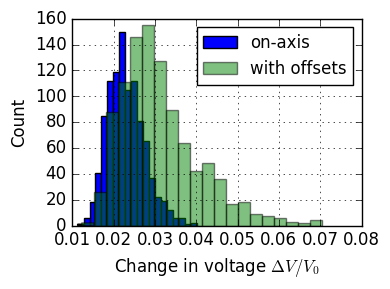

In [91]:
fig = plt.figure(figsize = (4,3))
plt.hist(delta_E_0s_1, alpha = 1, bins = 20, label = 'on-axis')
plt.hist(delta_Es_1, alpha = 0.5, bins = 20, label = 'with offsets')
#plt.hist(delta_E_0s_2, alpha = 0.5, bins = 25, normed = True)
#plt.hist(delta_Es_2, alpha = 0.5, bins = 25, normed = True)
plt.grid()
plt.legend(loc = 'best', fontsize = 12)
plt.xlabel('Change in voltage $\Delta V/V_{0}$', size = 12)
plt.ylabel('Count', size = 12)
plt.tick_params(labelsize = 12)
fig.tight_layout()
plt.savefig('simulated_dV.png', dpi = 100)
plt.show()

In [ ]:
#plt.hist(delta_E_0s_1, bins = 100, color = 'blue')
#plt.hist(delta_Es_1, bins = 20, color = 'red', alpha = 0.5)

plt.hist(delta_E_0s_2, bins = 20, color = 'blue')
#plt.hist(delta_Es_2, bins = 20, color = 'red', alpha = 0.5)

#plt.xlim(0,1)
plt.show()